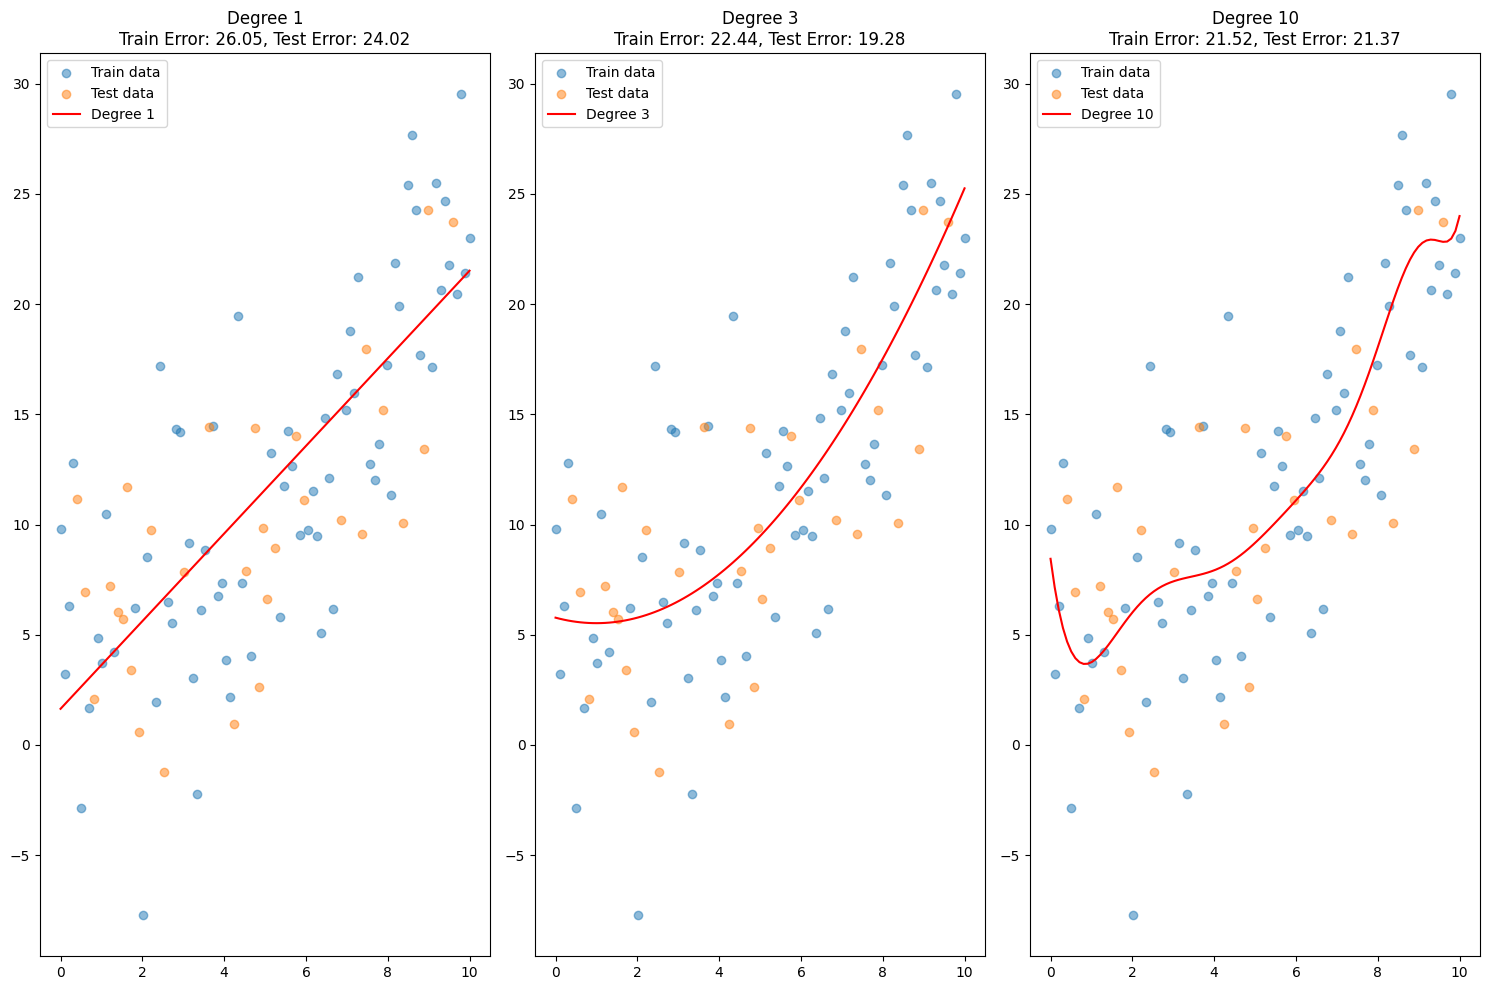

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#建立模擬資料：y = 2x + 1加上雜訊
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(scale=5, size=100)

x = x.reshape(-1, 1)
#拆分數據集為訓練集和測試集（70%訓練集 30%測試集）
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

plt.figure(figsize=(15, 10))
#多項式回歸
#使用不同的多項式度數進行擬合（一次、三次、十次多項式）
degrees = [1, 3, 10]
for i, d in enumerate(degrees):
    poly = PolynomialFeatures(degree=d)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    
    #使用線性回歸模型擬合多項式特徵
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    #預測訓練集和測試集
    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)
    #計算均方誤差（誤差越小，模型擬合越好）
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    #繪製擬合結果
    plt.subplot(1, 3, i + 1)
    plt.scatter(x_train, y_train, label="Train data", alpha=0.5)
    plt.scatter(x_test, y_test, label="Test data", alpha=0.5)
    #繪製擬合曲線
    x_plot = np.linspace(0, 10, 100).reshape(-1, 1)
    y_plot = model.predict(poly.transform(x_plot))
    plt.plot(x_plot, y_plot, color="red", label=f"Degree {d}")
    #繪製真實函數
    plt.title(f"Degree {d}\nTrain Error: {train_error:.2f}, Test Error: {test_error:.2f}")
    plt.legend()

plt.tight_layout()
plt.show()